In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
df = pd.read_csv('insurance.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understanding the data

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# #  Checking what age group of people are maximum and how the data is distributed

In [6]:
plt.figure(figsize = (10,8))
sns.distplot(df['age'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x800 with 1 Axes>

# Checking relationship between Sex and Insurance Charges

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

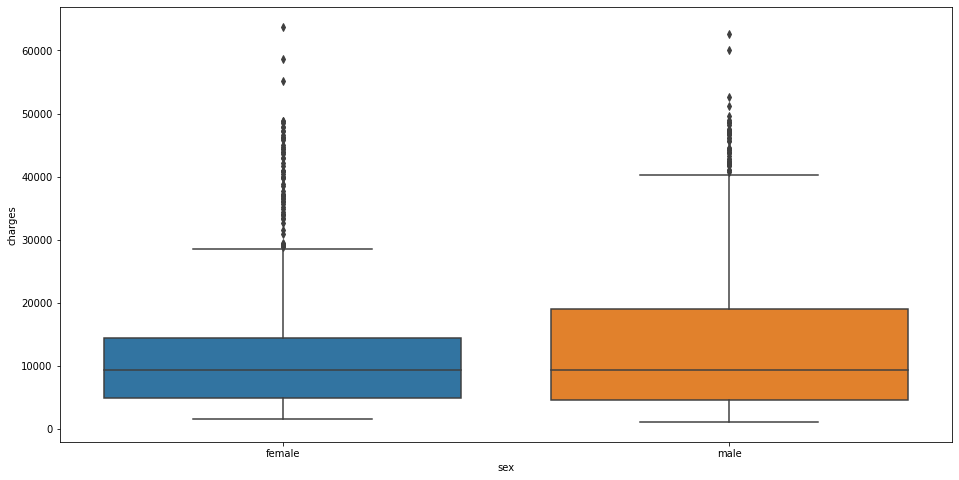

In [7]:
plt.figure(figsize = (16,8))
sns.boxplot(df['sex'],df['charges'])
plt.show()

# Checking relationship between smokers and charges

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

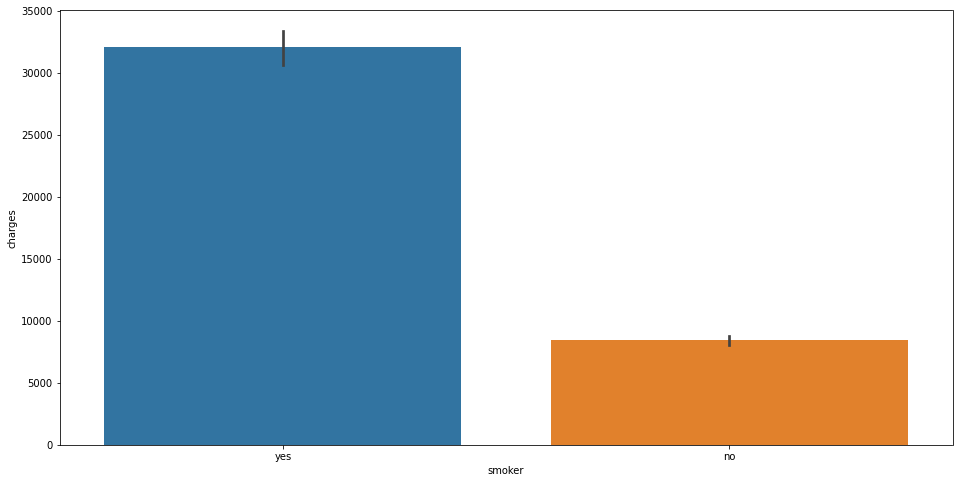

In [8]:
plt.figure(figsize = (16,8))
sns.barplot(df['smoker'],df['charges'])
plt.show()

In [9]:
# we got to know that there is a large variation in insurance charges among smokers and non- smokers

# BMI is normally distributed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

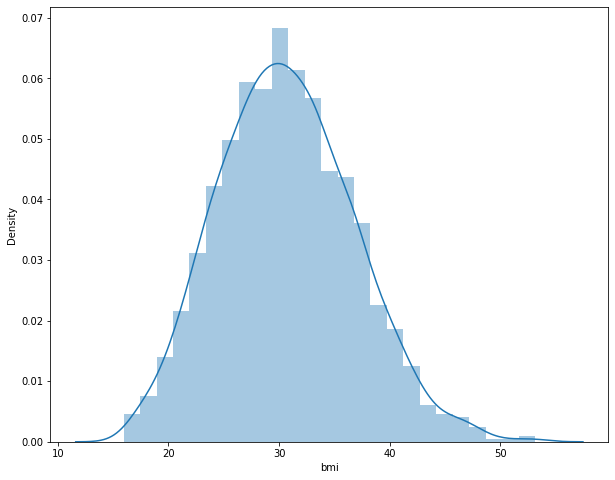

In [10]:
plt.figure(figsize = (10,8))
sns.distplot(df['bmi'])
plt.show()


# Relationship between no of children and insurance charges

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

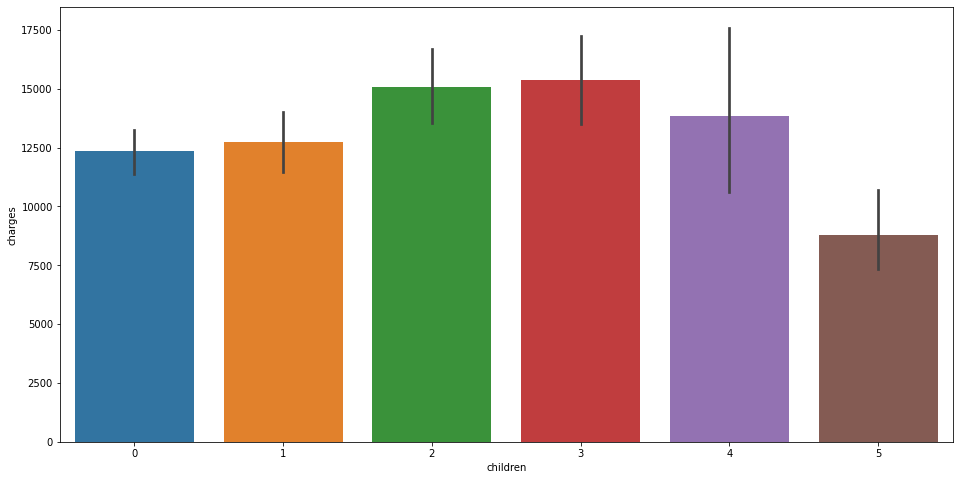

In [11]:
plt.figure(figsize = (16,8))
sns.barplot(df['children'],df['charges'])
plt.show()

In [12]:
# There is no relationship between insurance charges and nuber of children

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

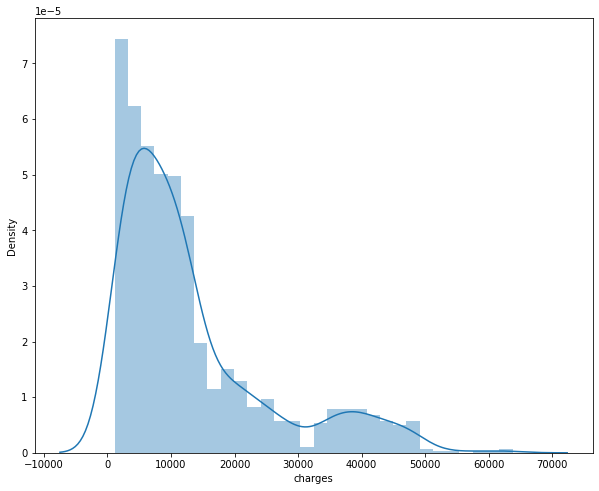

In [13]:
plt.figure(figsize = (10,8))
sns.distplot(df['charges'])
plt.show()

In [14]:
# most of the charges are around 1000 - 10000 and raising peak level at 1000

# Handling categorical variables

In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
a = pd.get_dummies(df['sex'])

<IPython.core.display.Javascript object>

In [18]:
a

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [19]:
df['Female'] = a['female']

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Female
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [21]:
y = pd.get_dummies(df['smoker'])

<IPython.core.display.Javascript object>

In [22]:
y

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [23]:
df['smoker'] = y['yes']

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Female
0,19,female,27.900,0,1,southwest,16884.92400,1
1,18,male,33.770,1,0,southeast,1725.55230,0
2,28,male,33.000,3,0,southeast,4449.46200,0
3,33,male,22.705,0,0,northwest,21984.47061,0
4,32,male,28.880,0,0,northwest,3866.85520,0


In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [26]:
z = pd.get_dummies(df['region'])

<IPython.core.display.Javascript object>

In [27]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges,Female
0,19,female,27.90,0,1,southwest,16884.9240,1
1,18,male,33.77,1,0,southeast,1725.5523,0
2,28,male,33.00,3,0,southeast,4449.4620,0


In [28]:
df = df.merge(z, left_index= True,
    right_index= True)

In [29]:
df

,age,sex,bmi,children,smoker,region,charges,Female,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,1,0,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,0,0,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,0,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,0,0,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,0,0,1,0,0
1334,18,female,31.920,0,0,northeast,2205.98080,1,1,0,0,0
1335,18,female,36.850,0,0,southeast,1629.83350,1,0,0,1,0
1336,21,female,25.800,0,0,southwest,2007.94500,1,0,0,0,1


# Correlation

In [30]:
corr_mat = df.corr()

In [31]:
corr_mat['charges'].sort_values(ascending = False)

charges      1.000000
smoker       0.787251
age          0.299008
bmi          0.198341
southeast    0.073982
children     0.067998
northeast    0.006349
northwest   -0.039905
southwest   -0.043210
Female      -0.057292
Name: charges, dtype: float64

<IPython.core.display.Javascript object>

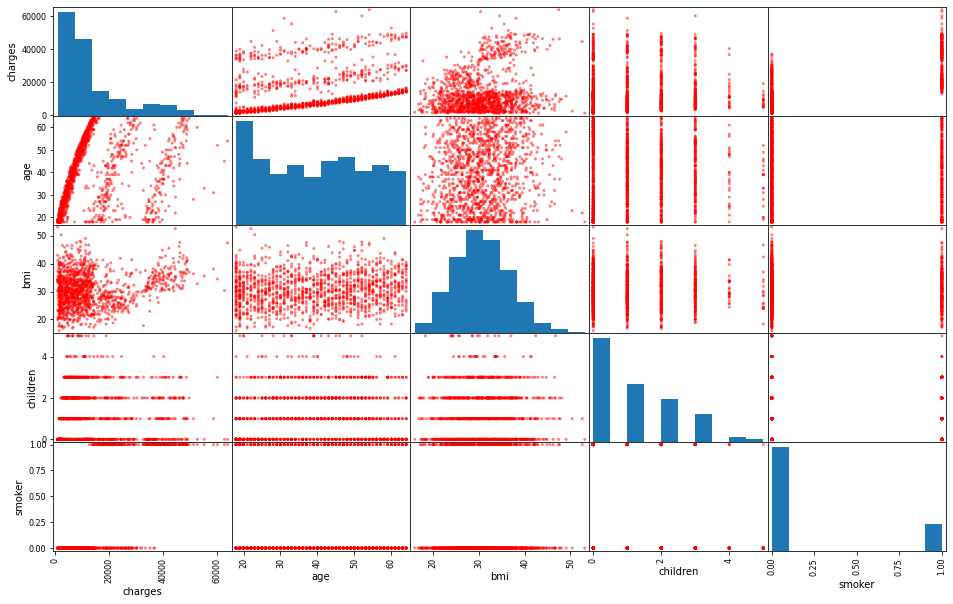

In [32]:
from pandas.plotting import scatter_matrix

attr = ['charges', 'age','bmi','children','smoker']
scatter_matrix(df[attr], figsize = (16,10),color = 'r', alpha = 0.5)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

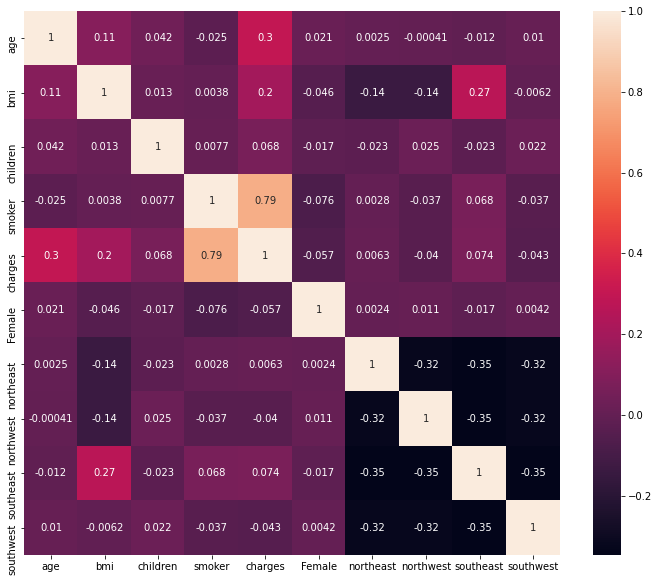

In [33]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_mat, annot = True)
plt.show()

# Dropping unnecessary columns

In [34]:
X = df.drop(['sex','region','charges','southwest'], axis = 1)

In [35]:
X

,age,bmi,children,smoker,Female,northeast,northwest,southeast
0,19,27.900,0,1,1,0,0,0
1,18,33.770,1,0,0,0,0,1
2,28,33.000,3,0,0,0,0,1
3,33,22.705,0,0,0,0,1,0
4,32,28.880,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0
1334,18,31.920,0,0,1,1,0,0
1335,18,36.850,0,0,1,0,0,1
1336,21,25.800,0,0,1,0,0,0


In [36]:
Y = df['charges']

In [37]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Train, Test, Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [40]:
x_train.shape

(1070, 8)

In [41]:
x_test.shape

(268, 8)

# Performing Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_predict = lr.predict(x_test)

In [46]:
#y_predict

In [47]:
lr.score(X,Y)

0.7507549400515897

In [48]:
df1 = pd.DataFrame(data = [y_predict,y_test]).T

<IPython.core.display.Javascript object>

In [49]:
df1.head(20)

,0,1
0,11169.927119,9724.53000
1,9486.709085,8547.69130
2,38181.123053,45702.02235
3,16266.313289,12950.07120
4,6914.648007,9644.25250
5,3963.484876,4500.33925
6,1579.396913,2198.18985
7,14385.256569,11436.73815
8,9012.579696,7537.16390
9,7508.460677,5425.02335


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

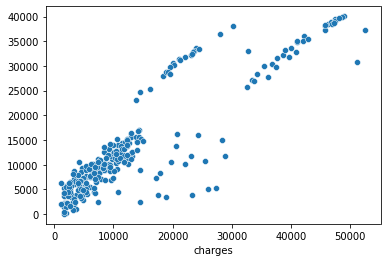

In [50]:
sns.scatterplot(y_test, y_predict)
plt.show()

# Model Evaluation

In [51]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error

In [52]:
mae_value = mean_absolute_error(y_test,y_predict)
mse_value = mean_squared_error(y_test, y_predict)
score = r2_score(y_test, y_predict)

In [53]:
print(mae_value)
print(mse_value)
print(score)

3933.272649405236
31827950.22952385
0.7999876970680433


In [54]:
VIF = 1/(1- score)
VIF

4.999692445620186

# Overfitting or Underfitting

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(lr, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 7)
rmse_score = np.sqrt(-scores)

<IPython.core.display.Javascript object>

In [57]:
rmse_score.mean()

6184.181662786183

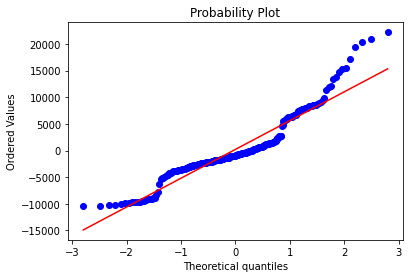

In [58]:
# Check for Multivariate Normality
# Q-Q plot 
import pylab 
import scipy.stats as stats  
stats.probplot((y_test - y_predict), dist="norm", plot=pylab)
pylab.show()


# Optimization to improve accuracy of Linear Regression

In [59]:
#corr_mat['charges'].sort_values(ascending = False)

In [60]:
# considering threshold value more than  50

In [61]:
#X = df[['smoker','age','children','bmi','southeast','northeast','northwest','southwest']]
#X = df[['smoker']]
#Y = df['charges']


In [62]:
#Y

In [63]:
# x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
# lr = LinearRegression()
# lr.fit(x_train,y_train)
# y_predict = lr.predict(x_test)

# mae_value = mean_absolute_error(y_test,y_predict)
# mse_value = mean_squared_error(y_test, y_predict)
# score = r2_score(y_test, y_predict)

# print(mae_value)
# print(mse_value)
# print(score)

In [64]:
## By performing optimization and taking threshold more than 50 the r2 score got reduced to 67% so all features are playing important role.

# Decision Tree Regressor#

In [59]:

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred = dtr.predict(x_test)
#dtr.score(x_train,y_train)
r_square = r2_score(y_test,dtrpred)
print('R2 score using Decison Tree Regressor:',r_square)

R2 score using Decison Tree Regressor: 0.6976870631934009


# # RandomForest

In [60]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfrpred = rfr.predict(x_test)
#rfr.score(x_train,y_train)
r_square = r2_score(y_test,rfrpred)
print('R2 score using Random Forest:',r_square)

R2 score using Random Forest: 0.8779696476929179


# From the above 3 models i.e., Linear Regression, Decision Tree Regression, Random Forest  random forest gave me more accuracy around 89% So this model gives more accurate results.

In [61]:
X.head(3)

,age,bmi,children,smoker,Female,northeast,northwest,southeast
0,19,27.90,0,1,1,0,0,0
1,18,33.77,1,0,0,0,0,1
2,28,33.00,3,0,0,0,0,1


In [68]:
rfr.predict([[28,33.00,3,0,0,0,0,1]])[0]

7684.226603

In [69]:
Y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [70]:
with open('insurance.pkl','wb') as f:
    pickle.dump(rfr,f)

In [71]:
rf_model = pickle.load(open('insurance.pkl','rb'))
rf_model.predict([[28,33.00,3,0,0,0,0,1]])

array([4353.8221])

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   smoker     1338 non-null   uint8  
 4   Female     1338 non-null   uint8  
 5   northeast  1338 non-null   uint8  
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 38.0 KB
